In [1]:
''' CNN MNIST digits classification

3-layer CNN for MNIST digits classification 
First 2 layers - Conv2D-ReLU-MaxPool
3rd layer - Conv2D-ReLU-Dropout
4th layer - Dense(10)
Output Activation - softmax
Optimizer - Adam

99.4% test accuracy in 10epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''



from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# printing the shape of the training ans test set
print(f"Input Label of training set has the shape of  : {x_train.shape}")
print(f"Output Label of training set has the shape of : {y_train.shape}")
print(f"Input Label of test set has the shape of      : {x_test.shape}")
print(f"Output Label of test set has the shape of     : {y_test.shape}")

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

# enable this if pydot can be installed
# pip install pydot
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Input Label of training set has the shape of  : (60000, 28, 28)
Output Label of training set has the shape of : (60000, 10)
Input Label of test set has the shape of      : (10000, 28, 28)
Output Label of test set has the shape of     : (10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
      

In [3]:
%pip install graphviz

In [66]:
'''A simple MLP in Keras implementing linear regression.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np

# keras modules
from  keras.models import Sequential
from  keras.layers import Dense 
from  keras.utils import plot_model

# generate x data
x = np.arange(-1,1,0.1)
x = np.reshape(x, [-1,1])

# generate y data
y = 2 * x + 3

# True if noise is added to y
is_noisy = True

# add noise if enabled
if is_noisy:
    noise = np.random.uniform(-0.1, 0.1, x.shape)
    x = x + noise

# deep learning method
# build 2-layer MLP network 
model = Sequential()
# 1st MLP has 8 units (perceptron), input is 1-dim
model.add(Dense(units=8, input_dim=1))
# 2nd MLP has 1 unit, output is 1-dim
model.add(Dense(units=16))
model.add(Dense(units=1))
# print summary to double check the network
model.summary()
# create a nice image of the network model
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='linear-model.png', show_shapes=True)
# indicate the loss function and use stochastic gradient descent
# (sgd) as optimizer
model.compile(loss='mse', optimizer='adam')
# feed the network with complete dataset (1 epoch) 100 times
# batch size of sgd is 4
model.fit(x, y, epochs=100, batch_size=8)
# simple validation by predicting the output based on x
ypred = model.predict(x)

# linear algebra method
ones = np.ones(x.shape)
# A is the concat of x and 1s
A = np.concatenate([x,ones], axis=1)
# compute k using using pseudo-inverse
k = np.matmul(np.linalg.pinv(A), y) 
print("k (Linear Algebra Method):")
print(k)
# predict the output using linear algebra solution
yla = np.matmul(A, k)

# print ground truth, linear algebra, MLP solutions
outputs = np.concatenate([y, yla, ypred], axis=1)
print("Ground Truth, Linear Alg Prediction, MLP Prediction")
print(outputs)

# Uncomment to see the output for a new input data 
# that is not part of the training data.
x = np.array([2,1,0])
ypred = model.predict(x)
print("2*2+3=7,pred=",ypred[0][0],"diff=",ypred[0][0]-7)
print("m=2,c=3,","predicted m=",str(ypred[0][0]-ypred[1][0]),",c=",ypred[2][0])


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 8)                 16        
                                                                 
 dense_242 (Dense)           (None, 16)                144       
                                                                 
 dense_243 (Dense)           (None, 1)                 17        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 9.8026
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 9.6416
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 9.4464
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 9.3034
Epoch 5

In [8]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from  keras.models import Sequential
from  keras.layers import Dense, Activation, Dropout
from  keras.utils import to_categorical, plot_model
from  keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [67]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from  keras.models import Sequential
from  keras.layers import Dense, Activation, SimpleRNN
from  keras.utils import to_categorical, plot_model
from  keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense_244 (Dense)           (None, 10)                2570      
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 0.7514 - accuracy: 0.7876
Epoch 2/20
469/469 [==============================] - 9s 18ms/step - loss: 0.3231 - accuracy: 0.9059
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2355 - accuracy: 0.9307
Epoch 4/20

C:\Users\Raja Babu\AppData\Local\Temp\ipykernel_20776\1716227877.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


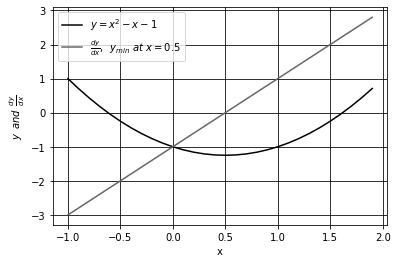

In [68]:
'''Utility for plotting a 2nd deg polynomial and
its derivative
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('grayscale')
x = np.arange(-1, 2, 0.1)
c = [1, -1, -1]
d = [2, -1]
y = np.polyval(c, x)
z = np.polyval(d, x)
plt.xlabel('x')
plt.ylabel(r'$y\/\/\/and\/\/\/\frac{dy}{dx}$')
plt.plot(x, y, label=r'$y=x^2 -x -1$')
plt.plot(x, z, label=r'$\frac{dy}{dx},\/\/\/y_{min}\/\/at\/\/x=0.5$')
plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("sgd.png")
plt.show()
plt.close('all')


In [69]:
'''Implements a Y-Network using Functional API

~99.3% test accuracy
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from  keras.layers import Dense, Dropout, Input
from  keras.layers import Conv2D, MaxPooling2D
from  keras.layers import Flatten, concatenate
from  keras.models import Model
from  keras.datasets import mnist
from  keras.utils import to_categorical
from  keras.utils import plot_model

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

# left branch of Y network
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

# right branch of Y network
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    y = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

# merge left and right branches outputs
y = concatenate([x, y])
# feature maps to vector before connecting to Dense 
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model in functional API
model = Model([left_inputs, right_inputs], outputs)

# verify the model using graph
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

# verify the model using layer text description
model.summary()

# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model with input images and labels
model.fit([x_train, x_train],
          y_train, 
          validation_data=([x_test, x_test], y_test),
          epochs=20,
          batch_size=batch_size)

# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                              

In [3]:
"""Trains a 100-Layer DenseNet on the CIFAR10 dataset.

With data augmentation:
Greater than 93.55% test accuracy in 200 epochs
225sec per epoch on GTX 1080Ti

Densely Connected Convolutional Networks
https://arxiv.org/pdf/1608.06993.pdf
http://openaccess.thecvf.com/content_cvpr_2017/papers/
    Huang_Densely_Connected_Convolutional_CVPR_2017_paper.pdf
Network below is similar to 100-Layer DenseNet-BC (k=12)
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from  keras.layers import Dense, Conv2D, BatchNormalization
from  keras.layers import MaxPooling2D, AveragePooling2D
from  keras.layers import Input, Flatten, Dropout
from  keras.layers import concatenate, Activation
from  keras.optimizers import RMSprop
from  keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from  keras.callbacks import LearningRateScheduler
from  keras.preprocessing.image import ImageDataGenerator
from  keras.models import Model
from  keras.datasets import cifar10
from  keras.utils import plot_model
from  keras.utils import to_categorical
import os
import numpy as np
import math

# training parameters
batch_size = 32
epochs = 200
data_augmentation = True

# network parameters
num_classes = 10
num_dense_blocks = 3
use_max_pool = False

# DenseNet-BC with dataset augmentation
# Growth rate   | Depth |  Accuracy (paper)| Accuracy (this)      |
# 12            | 100   |  95.49%          | 93.74%               |
# 24            | 250   |  96.38%          | requires big mem GPU |
# 40            | 190   |  96.54%          | requires big mem GPU |
growth_rate = 12
depth = 100
num_bottleneck_layers = (depth - 4) // (2 * num_dense_blocks)

num_filters_bef_dense_block = 2 * growth_rate
compression_factor = 0.5

# load the CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
input_shape = x_train.shape[1:]

# mormalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


# start model definition
# densenet CNNs (composite function) are made of BN-ReLU-Conv2D
inputs = Input(shape=input_shape)
x = BatchNormalization()(inputs)
x = Activation('relu')(x)
x = Conv2D(num_filters_bef_dense_block,
           kernel_size=3,
           padding='same',
           kernel_initializer='he_normal')(x)
x = concatenate([inputs, x])

# stack of dense blocks bridged by transition layers
for i in range(num_dense_blocks):
    # a dense block is a stack of bottleneck layers
    for j in range(num_bottleneck_layers):
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        y = Conv2D(4 * growth_rate,
                   kernel_size=1,
                   padding='same',
                   kernel_initializer='he_normal')(y)
        if not data_augmentation:
            y = Dropout(0.2)(y)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(growth_rate,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal')(y)
        if not data_augmentation:
            y = Dropout(0.2)(y)
        x = concatenate([x, y])

    # no transition layer after the last dense block
    if i == num_dense_blocks - 1:
        continue

    # transition layer compresses num of feature maps and reduces the size by 2
    num_filters_bef_dense_block += num_bottleneck_layers * growth_rate
    num_filters_bef_dense_block = int(num_filters_bef_dense_block * compression_factor)
    y = BatchNormalization()(x)
    y = Conv2D(num_filters_bef_dense_block,
               kernel_size=1,
               padding='same',
               kernel_initializer='he_normal')(y)
    if not data_augmentation:
        y = Dropout(0.2)(y)
    x = AveragePooling2D()(y)


# add classifier on top
# after average pooling, size of feature map is 1 x 1
x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)
outputs = Dense(num_classes,
                kernel_initializer='he_normal',
                activation='softmax')(y)

# instantiate and compile model
# orig paper uses SGD but RMSprop works better for DenseNet
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(1e-3),
              metrics=['acc'])
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file="cifar10-densenet.png", show_shapes=True)
model.save('my_model.h5')
# prepare model model saving directory
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_densenet_model.{epoch:02d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
model.save(model_name)

# prepare callbacks for model saving and for learning rate reducer
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# run training, with or without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # preprocessing  and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (deg 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(x_train)

    steps_per_epoch = math.ceil(len(x_train) / batch_size)
    # fit the model on the batches generated by datagen.flow().
    model.fit(x=datagen.flow(x_train, y_train, batch_size=batch_size),
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch,
              callbacks=callbacks)


    # fit the model on the batches generated by datagen.flow()
    #model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
    ##                    steps_per_epoch=x_train.shape[0] // batch_size,
    #                    validation_data=(x_test, y_test),
    #                    epochs=epochs, verbose=1,
    #                    callbacks=callbacks)

# score trained model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_198 (Batch  (None, 32, 32, 3)   12          ['input_3[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 activation_194 (Activation)    (None, 32, 32, 3)    0           ['batch_normalization_198[0][0]']
                                                                                            